In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)


In [3]:
data = np.zeros((1000,3))

In [4]:
data[:500,:-1] = dist_01
data[500:,:-1] = dist_02

data[500:,-1] = 1.0

In [5]:
np.random.shuffle(data)

In [6]:
# splitting data
split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
X_test = data[split:,:-1]
Y_train = data[:split,-1]
Y_test = data[split:,-1]

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(800, 2) (200, 2) (800,) (200,)


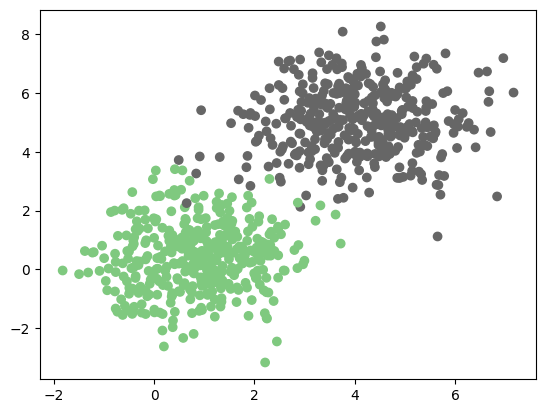

In [7]:
# plot and Normalize the data
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.Accent)
plt.show()

In [8]:
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)

X_train = (X_train-x_mean)/x_std

X_test = (X_test-x_mean)/x_std

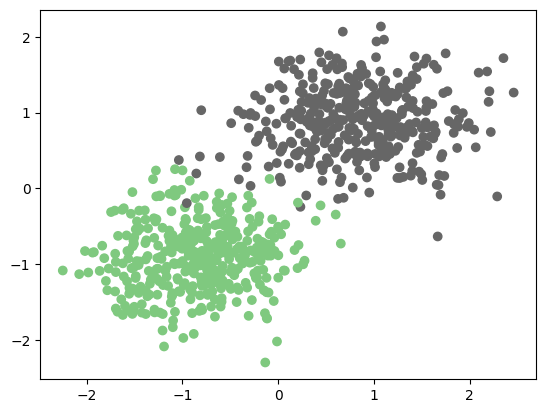

In [9]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.Accent)
plt.show()


# Implementation

In [64]:

def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))
    
def error(X,y,theta):
    hi = hypothesis(X,theta)
    e = -1*np.mean((y*np.log(hi) + ((1-y)*np.log(1-hi))))
    return e
    
def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = -np.dot(X.T,(y-hi))
    m = X.shape[0]
    
    return grad/m
    

def gradiant_descent(X,y,lr=0.4,max_itr=500):
    n = X.shape[1]
    
    theta = np.zeros((n,1))
    error_list = []
    
    for i in range(max_itr):
        err = error(X,y,theta)
        error_list.append(err)
        
        grad = gradient(X,y,theta)
        
        theta = theta - lr*grad
        
    return (theta, error_list)

In [65]:
ones = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones, X_train))
# print(X_new_train.shape)
# print(X_new_train)
Y_train = Y_train.reshape((-1,1))

In [66]:
theta, error_list = gradiant_descent(X_new_train, Y_train)
theta

array([[0.32834322],
       [2.6160471 ],
       [4.49398114]])

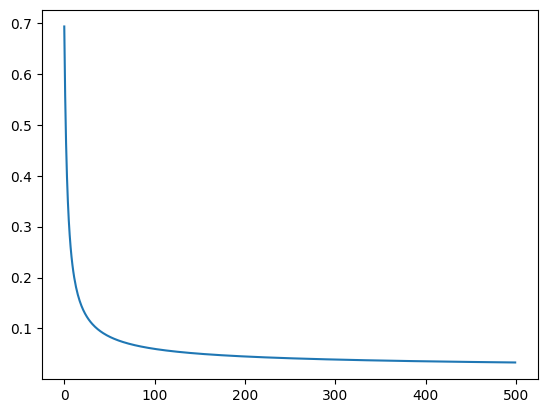

In [67]:
plt.plot(error_list)

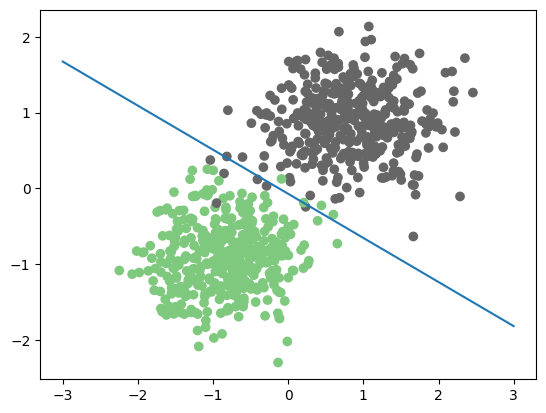

In [68]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train.reshape((-1,)), cmap=plt.cm.Accent)

x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.show()

# SK-Learn 

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [100]:
# Y_train.reshape((800,-1))
Y_train = Y_train.ravel()
Y_train

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0.

In [101]:
model.fit(X_train, Y_train)

LogisticRegression()

In [102]:
theta_0 = model.intercept_
theta_s = model.coef_

In [103]:
print(theta_0)
print(theta_s)

[0.352294]
[[2.37911295 4.75425566]]


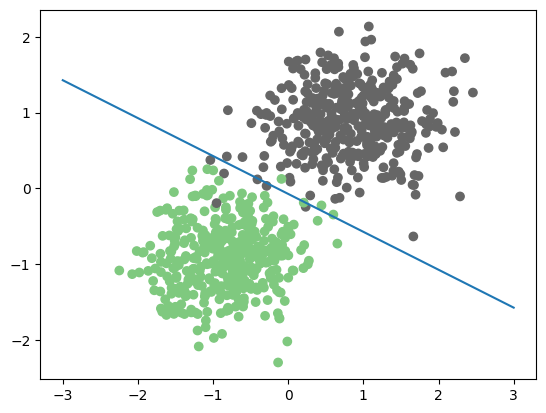

In [39]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train.reshape((-1,)), cmap=plt.cm.Accent)

x1 = np.arange(-3,4)
x2 = -(theta_0 + theta_s[0][0]*x1)/theta_s[0][1]
plt.plot(x1,x2)
plt.show()

In [70]:
model.score(X_train, Y_train)

0.98875

In [71]:
model.score(X_test, Y_test)

1.0

In [73]:
Y_pred = model.predict(X_test)

In [74]:
Y_pred.shape

(200,)